In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## hw_7_2

In [3]:
# 1. 교통 데이터 생성
data = pd.DataFrame({
    'Trip ID': [1, 2, 3, 4, 5],  # 각 트립의 고유 ID
    'Age': [25, 34, 45, 29, 40],  # 운전자 나이 (제거할 컬럼)
    'Car Color': ['Red', 'Blue', 'Green', 'Red', 'Black'],  # 차량 색상 (제거할 컬럼)
    'Destination From': ['A', 'B', 'C', 'D', 'E'],  # 출발지
    'Destination To': ['F', 'G', 'H', 'I', 'J'],  # 도착지
    'Distance (km)': [12.5, 25.3, 19.8, 30.2, 15.7]  # 이동 거리 (km)
})

data

,Trip ID,Age,Car Color,Destination From,Destination To,Distance (km)
0,1,25,Red,A,F,12.5
1,2,34,Blue,B,G,25.3
2,3,45,Green,C,H,19.8
3,4,29,Red,D,I,30.2
4,5,40,Black,E,J,15.7


In [4]:
# 2. 불필요한 컬럼 제거
data_cleaned = data.drop(columns=['Age' , 'Car Color'])  # 'Age', 'Car Color' 제거
data_cleaned

,Trip ID,Destination From,Destination To,Distance (km)
0,1,A,F,12.5
1,2,B,G,25.3
2,3,C,H,19.8
3,4,D,I,30.2
4,5,E,J,15.7


In [5]:
# 3. 가장 먼 거리 찾기
max_distance = data_cleaned['Distance (km)'].max()  # 'Distance (km)'에서 최대값 찾기
max_distance

np.float64(30.2)

In [6]:
# 4. 최대 거리를 가진 출발지-도착지 찾기
longest_trip = data_cleaned[data_cleaned['Distance (km)'] == max_distance ]  # 최대 거리와 일치하는 행 선택
longest_trip

,Trip ID,Destination From,Destination To,Distance (km)
3,4,D,I,30.2


In [7]:
# 5. 결과 출력
print("가장 먼 거리의 출발지-도착지 경로: ")
longest_trip[['Destination From', 'Destination To', 'Distance (km)']]  # 'Destination From', 'Destination To', 'Distance (km)' 출력

가장 먼 거리의 출발지-도착지 경로: 


,Destination From,Destination To,Distance (km)
3,D,I,30.2


## hw_7_4

In [8]:
# 1. 교통 데이터 생성
data = pd.DataFrame({
    'Trip ID': [1, 2, 3, 4, 5, 6],  # 각 트립(여행)의 고유 ID
    'Distance (km)': [5, 20, 50, 200, 15, 30],  # 이동 거리 (km)
    'Duration (hours)': [0.2, 0.5, 1, 3, 0.3, 0.8]  # 이동 시간 (시간 단위)
})
data

,Trip ID,Distance (km),Duration (hours)
0,1,5,0.2
1,2,20,0.5
2,3,50,1.0
3,4,200,3.0
4,5,15,0.3
5,6,30,0.8


In [9]:
# 2. 평균 속도 계산 (km/h)
# 평균 속도 = 이동 거리(km) / 이동 시간(시간)
data['Speed (km/h)'] = data['Distance (km)'] / data['Duration (hours)']  # 빈칸 채우기
data

,Trip ID,Distance (km),Duration (hours),Speed (km/h)
0,1,5,0.2,25.000000
1,2,20,0.5,40.000000
2,3,50,1.0,50.000000
3,4,200,3.0,66.666667
4,5,15,0.3,50.000000
5,6,30,0.8,37.500000


In [10]:
# 3. IQR 기반 이상치 탐지
# IQR(Interquartile Range) 계산
Q1 = data['Speed (km/h)'].quantile(.25)  # 1사분위수 (25%)
Q3 = data['Speed (km/h)'].quantile(.75)  # 3사분위수 (75%)
IQR = Q3 - Q1  # 사분위 범위 계산

# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR  # 하한값 계산
upper_bound = Q3 + 1.5 * IQR  # 상한값 계산
print(f'upper_bound: {upper_bound} / lower_bound: {lower_bound}')

# IQR 기준 이상치 여부 판별
data['IQR Outlier'] = (data['Speed (km/h)'] < lower_bound) | (data['Speed (km/h)'] > upper_bound)  # 빈칸 채우기

data

upper_bound: 67.8125 / lower_bound: 20.3125


,Trip ID,Distance (km),Duration (hours),Speed (km/h),IQR Outlier
0,1,5,0.2,25.000000,False
1,2,20,0.5,40.000000,False
2,3,50,1.0,50.000000,False
3,4,200,3.0,66.666667,False
4,5,15,0.3,50.000000,False
5,6,30,0.8,37.500000,False


🔍 Z-score 기준: 왜 ±2 또는 ±3?
Z-score는 정규분포(가우시안 분포)를 전제로 한 값입니다. 평균에서 얼마나 떨어져 있는지를 표준편차 기준으로 나타냅니다.

✅ ±2 기준
Z-score가 ±2를 넘는 데이터는 전체의 약 4.55% (양쪽 꼬리 합산)를 차지합니다.

즉, 좀 더 민감하게 이상치를 탐지하고 싶을 때 사용됩니다.

작은 데이터셋이나, 미묘한 이상치도 잡고 싶을 때 적합합니다.

✅ ±3 기준
Z-score가 ±3을 넘는 데이터는 전체의 약 **0.27%**밖에 안 됩니다.

정말 극단적인 값만 이상치로 판단할 때 사용합니다.

대규모 데이터셋에서 사용하거나, 너무 민감한 탐지를 피하고 싶을 때 사용합니다.

👉 즉, ±2는 보수적으로, ±3은 관대하게 이상치를 판단하는 기준입니다.
업무나 분석 목적에 따라 기준을 바꾸면 됩니다!



In [11]:
# 4. Z-score 기반 이상치 탐지
# Z-score 계산
data['Z-score'] = stats.zscore(data['Speed (km/h)'])  # 빈칸 채우기

# 일반적으로 Z-score가 ±2 이상이면 이상치로 간주
data['Z-score Outlier'] = abs(data['Z-score']) > 2  # 빈칸 채우기

data


,Trip ID,Distance (km),Duration (hours),Speed (km/h),IQR Outlier,Z-score,Z-score Outlier
0,1,5,0.2,25.000000,False,-1.537990,False
1,2,20,0.5,40.000000,False,-0.376431,False
2,3,50,1.0,50.000000,False,0.397941,False
3,4,200,3.0,66.666667,False,1.688563,False
4,5,15,0.3,50.000000,False,0.397941,False
5,6,30,0.8,37.500000,False,-0.570024,False


In [12]:
# 5. 결과 출력
print("이상치 탐지 결과")
data[['Trip ID', 'Speed (km/h)', 'IQR Outlier', 'Z-score Outlier']]


이상치 탐지 결과


,Trip ID,Speed (km/h),IQR Outlier,Z-score Outlier
0,1,25.000000,False,False
1,2,40.000000,False,False
2,3,50.000000,False,False
3,4,66.666667,False,False
4,5,50.000000,False,False
5,6,37.500000,False,False


## 시각화

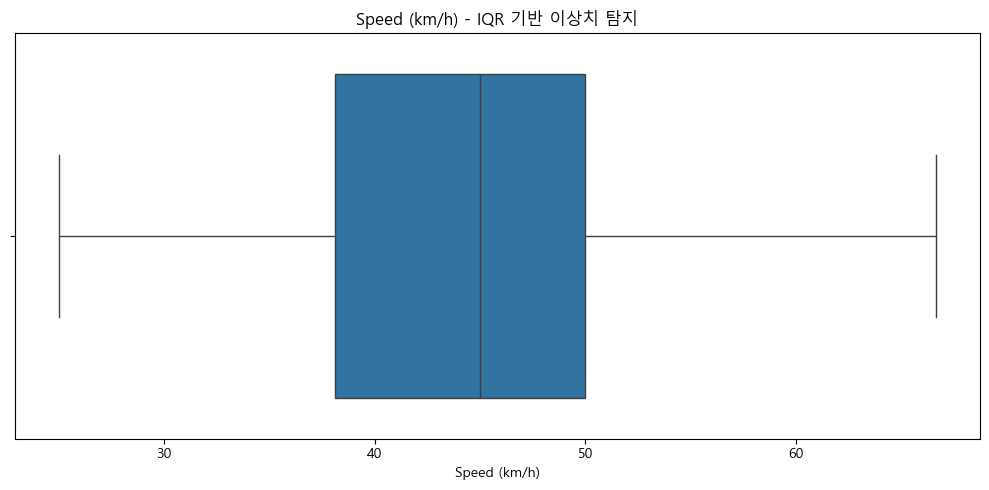

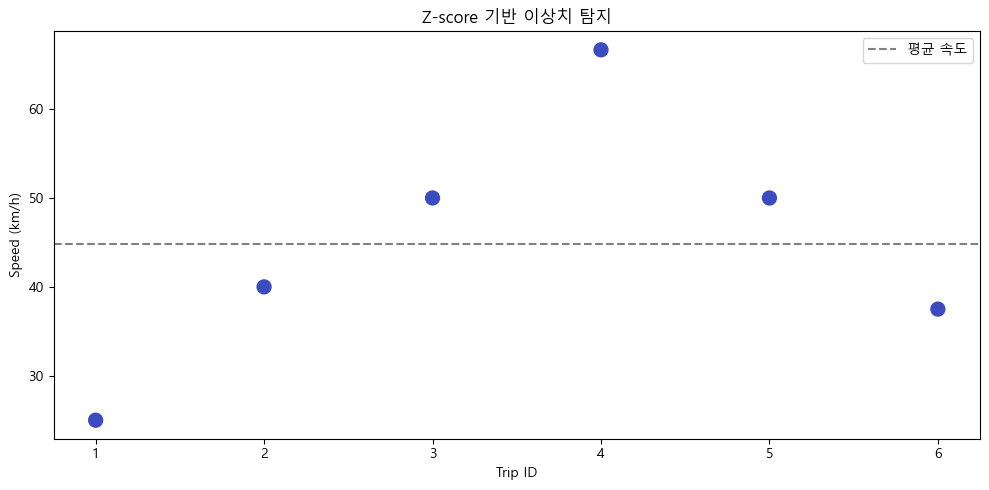

In [15]:
# IQR 이상치 시각화
plt.figure(figsize=(10, 5))
sns.boxplot(x=data['Speed (km/h)'])
plt.title("Speed (km/h) - IQR 기반 이상치 탐지")
# 📌 **레이아웃 조정**
plt.tight_layout()
plt.show()

# Z-score 이상치 시각화
plt.figure(figsize=(10, 5))
plt.scatter(data['Trip ID'], data['Speed (km/h)'], c=data['Z-score Outlier'], cmap='coolwarm', s=100)
plt.axhline(y=data['Speed (km/h)'].mean(), color='gray', linestyle='--', label='평균 속도')
plt.title("Z-score 기반 이상치 탐지")
plt.xlabel("Trip ID")
plt.ylabel("Speed (km/h)")
plt.legend()
# 📌 **레이아웃 조정**
plt.tight_layout()
plt.show()
